In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; seaborn.set()
import matplotlib
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False   

## 데이터 불러오기

In [46]:
data = pd.read_csv('C:/Users/82106/Desktop/데이터마이닝/data.csv')
data.head()

,Unnamed: 0,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,4481,1,1931,b,2016-06-01,13:31,0,경기 수원시,한식 음식점업,1071.428571
1,4482,1,1932,h,2016-06-01,14:18,0,경기 수원시,한식 음식점업,428.571429
2,4483,1,1933,c,2016-06-01,15:07,0,경기 수원시,한식 음식점업,1142.857143
3,4484,1,1934,g,2016-06-01,15:12,0,경기 수원시,한식 음식점업,1142.857143
4,4485,1,1935,a,2016-06-01,16:06,0,경기 수원시,한식 음식점업,1071.428571


In [47]:
data.drop('Unnamed: 0' , axis = 1 , inplace = True)

## 지역명 변수 바꾸기

In [48]:
data['region'] = data['region'].str[:2]
data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,1,1931,b,2016-06-01,13:31,0,경기,한식 음식점업,1071.428571
1,1,1932,h,2016-06-01,14:18,0,경기,한식 음식점업,428.571429
2,1,1933,c,2016-06-01,15:07,0,경기,한식 음식점업,1142.857143
3,1,1934,g,2016-06-01,15:12,0,경기,한식 음식점업,1142.857143
4,1,1935,a,2016-06-01,16:06,0,경기,한식 음식점업,1071.428571


In [49]:
data['region'].value_counts()

경기    1407272
서울    1023224
경남     590009
부산     521523
경북     381054
충북     348314
충남     315258
대구     302744
인천     279526
강원     246625
전북     208457
대전     206956
울산     181045
전남     177175
광주     171421
제주     166565
세종      29366
0          79
Name: region, dtype: int64

## 0값은 삭제해준다

In [50]:
data.drop(data.loc[data['region'] == '0'].index, inplace=True)

In [51]:
data['region'].value_counts()

경기    1407272
서울    1023224
경남     590009
부산     521523
경북     381054
충북     348314
충남     315258
대구     302744
인천     279526
강원     246625
전북     208457
대전     206956
울산     181045
전남     177175
광주     171421
제주     166565
세종      29366
Name: region, dtype: int64

In [52]:
data['type_of_business'].value_counts()

한식 음식점업                     1878111
두발 미용업                       449381
의복 소매업                       398416
기타 주점업                       257786
치킨 전문점                       224790
                             ...   
주방용품 및 가정용 유리, 요업 제품 소매업       1387
배전반 및 전기 자동제어반 제조업             1342
그 외 기타 생활용품 도매업                1306
신선식품 및 단순 가공식품 도매업              581
0                                72
Name: type_of_business, Length: 146, dtype: int64

In [53]:
data.drop(data.loc[data['type_of_business'] == '0'].index, inplace=True)

In [54]:
data['type_of_business'].value_counts()

한식 음식점업                     1878111
두발 미용업                       449381
의복 소매업                       398416
기타 주점업                       257786
치킨 전문점                       224790
                             ...   
곡물 및 기타 식량작물 재배업               1432
주방용품 및 가정용 유리, 요업 제품 소매업       1387
배전반 및 전기 자동제어반 제조업             1342
그 외 기타 생활용품 도매업                1306
신선식품 및 단순 가공식품 도매업              581
Name: type_of_business, Length: 145, dtype: int64

In [55]:
import re

data['type_of_business'] = data['type_of_business'].str.replace("ㆍ", "")
data['type_of_business'] = data['type_of_business'].str.replace("··", "")
data['type_of_business'] = data['type_of_business'].str.replace(",", "")
data['type_of_business'] = data['type_of_business'].str.replace(" ", "")
data['type_of_business'] = data['type_of_business'].str.strip()

In [56]:
def bindtotype(w):

    a = ['한식음식점업']
    b = [ '두발미용업', '기타미용업', '이용업', '화장품비누및방향제소매업', '화장품및화장용품도매업', '피부미용업', '마사지업']
    c = ['의복소매업' , '유아용의류소매업', '섬유직물및의복악세사리소매업', '신발소매업', '속옷및잠옷소매업', '의복액세서리및모조장신구도매업', '한복소매업','신발도매업','유아용의류도매업','남녀용겉옷및셔츠도매업']
    d = ['기타주점업','비알코올음료점업']
    e = ['일식음식점업', '서양식음식점업', '중식음식점업', '기타외국식음식점업']
    f = ['간이음식포장판매전문점','김밥및기타간이음식점업']
    g = ['치킨전문점','피자햄버거샌드위치및유사음식점업']
    h = ['안경및렌즈소매업','애완용동물및관련용품소매업','그외기타분류안된상품전문소매업','전자상거래소매업','담배소매업','시계및귀금속소매업', '그외기타종합소매업','게임용구인형및장난감소매업', '슈퍼마켓',  '컴퓨터및주변장치소프트웨어소매업','기념품관광민예품및장식용품소매업', '가구소매업', '페인트창호및기타건설자재소매업','통신기기소매업','체인화편의점','공구소매업','서적신문및잡지류소매업','사무용기기소매업','그외기타무점포소매업','예술품및골동품소매업','문구용품및회화용품소매업']
    i = ['철물금속파스너및수공구도매업', '그외기타상품전문도매업', '상품종합도매업', '악기도매업','문구용품회화용품사무용품도매업', '배관및냉난방장치도매업', '그외기타건축자재도매업','생활용유리요업목재금속제품및날붙이도매', '통신방송장비및부품도매업']

    j = ['가전제품소매업', '그외기타분류안된가정용품소매업', '주방용품및가정용유리요업제품소매업','커튼및침구용품도매업', '그외기타생활용품도매업']
    k = [ '육류소매업', '육류도매업', '신선냉동및기타수산물소매업', '기타식료품소매업', '기타음식료품위주종합소매업', '제과점업', '음료소매업','수산물가공식품도매업', '채소과실및뿌리작물소매업', '기타산업용농산물도매업', '신선냉동및기타수산물도매업', '신선식품및단순가공식품도매업']
    l = ['화초및식물소매업', '가정용직물제품소매업', '화훼류및식물도매업', '종자및묘목도매업']
    m = [ '일반교과학원', '기타스포츠교육기관', '기타예술학원', '기타교습학원', '외국어학원', '그외기타분류안된교육기관', '독서실운영업', '기타교육지원서비스업', '컴퓨터학원', '기타기술및직업훈련학원']
    n = ['당구장운영업', '노래연습장운영업', '낚시장운영업', '수영장운영업']
    
    aa = ['여관업','기타일반및생활숙박시설운영업']
    bb = [ '체력단련시설운영업', '그외기타스포츠서비스업', '그외기타스포츠시설운영업', '체형등기타신체관리서비스업', '골프연습장운영업', '운동및경기용품도매업', '운동및경기용품소매업', '스포츠및레크리에이션용품임대업', '스포츠클럽운영업']
    cc = [ '자전거및기타운송장비소매업', '자전거및기타운송장비도매업', '택배업', '모터사이클및부품도매업']
    dd = ['가정용세탁업']
    ee = ['인물사진및행사용영상촬영업', '그외기타달리분류되지않은개인서비스업', '그외기타창작및예술관련서비스업', '애완동물장묘및보호서비스업', '그외기타분류안된사업지원서비스업', '그외기타분류안된오락관련서비스업', '결혼상담및준비서비스업', '기타엔지니어링서비스업']
    ff = [ '자동차신품타이어및튜브판매업', '자동차세차업', '기타자동차신품부품및내장품판매업', '자동차중고부품및내장품판매업']
    gg = [ '자동차전문수리업', '통신장비수리업', '자동차종합수리업']
    hh = ['떡류제조업', '침구및관련제품제조업', '안경및안경렌즈제조업','그외기타나무제품제조업', '귀금속및관련제품제조업', '간판및광고물제조업', '배전반및전기자동제어반제조업']
    ii = [ '한의원', '일반의원']
    jj = [ '건강보조식품소매업', '의약품도매업', '의약품및의료용품소매업', '의료용품도매업' ]
    kk = [ '여행사업']
    ll = [ '기록매체복제업']
    oo = [ '기타건물관련설비설치공사업']
    pp = [  '기타인문및사회과학연구개발업']
    aaa = [  '예식장업']
    bbb = [  '경영컨설팅업']
    ccc = [  '곡물및기타식량작물재배업']
    if w in a:
        return '한식음식점업'
    elif w in b:
        return '미용업'
    elif w in c:
        return '의류업'
    elif w in d:
        return '주점'
    elif w in e:
        return '외국음식'
    elif w in f:
        return '간이음식'
    elif w in g:
        return '패스트푸드'
    elif w in h:
        return '소매업'
    elif w in i:
        return '도매업'
    elif w in j:
        return '가정용품'
    elif w in k:
        return '식료품'
    elif w in l:
        return '작물판매'
    elif w in m:
        return '학원'
    elif w in n:
        return '여가시설'
    elif w in aa:
        return '숙박시설'
    elif w in bb:
        return '운동'
    elif w in cc:
        return '운송관련'
    elif w in dd:
        return '세탁업'
    elif w in ee:
        return '서비스업'
    elif w in ff:
        return '자동차'
    elif w in gg:
        return '수리업'
    elif w in hh:
        return '제조업'
    elif w in ii:
        return '병원'
    elif w in jj:
        return '의약품'
    elif w in kk:
        return '여행사업'
    elif w in ll:
        return '복제업'
    elif w in oo:
        return '공사업'
    elif w in pp:
        return '연구개발업'
    elif w in aaa:
        return '예식장업'
    elif w in bbb:
        return '컨설팅업'
    else :
        return '재배업'
    
    
    
    


In [57]:
data['type_of_business'] = data['type_of_business'].apply(bindtotype)


In [58]:
data['type_of_business'].value_counts()

한식음식점업    1878111
미용업        659398
의류업        512187
외국음식       472112
소매업        470672
주점         440887
패스트푸드      349642
학원         296799
간이음식       263401
식료품        252096
운동         154483
여가시설       129234
서비스업        86138
작물판매        81998
자동차         80579
도매업         70329
수리업         48936
세탁업         43730
재배업         42350
숙박시설        40145
운송관련        40123
제조업         37445
가정용품        37001
의약품         31524
병원          18533
여행사업         4992
복제업          3482
공사업          2963
연구개발업        2913
예식장업         2671
컨설팅업         1588
Name: type_of_business, dtype: int64

# 날짜 데이터 불러오기

In [59]:
date=pd.read_csv('C:/Users/82106/Desktop/데이터마이닝/dm_date.csv')
date.head()

,Unnamed: 0,지점,지점명,일시,평균기온(°C),일강수량(mm)
0,0,105,강원,2016-06-01,19.6,NaN
1,1,105,강원,2016-06-02,20.5,NaN
2,2,105,강원,2016-06-03,25.3,NaN
3,3,105,강원,2016-06-04,23.9,NaN
4,4,105,강원,2016-06-05,17.8,NaN


In [60]:
date.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [61]:
date.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm)
0,105,강원,2016-06-01,19.6,NaN
1,105,강원,2016-06-02,20.5,NaN
2,105,강원,2016-06-03,25.3,NaN
3,105,강원,2016-06-04,23.9,NaN
4,105,강원,2016-06-05,17.8,NaN


In [62]:
date.drop('지점', axis = 1 ,inplace = True)

## 평균기온을 fillna로 채워줌

In [63]:
date.isnull().sum()

지점명             0
일시              0
평균기온(°C)        9
일강수량(mm)    10720
dtype: int64

In [64]:
date['평균기온(°C)']=date['평균기온(°C)'].fillna(method='ffill')

In [65]:
date['평균기온(°C)'].isnull().sum()

0

In [66]:
date.isnull().sum()

지점명             0
일시              0
평균기온(°C)        0
일강수량(mm)    10720
dtype: int64

## 비가 오지 않은 날의 데이터는 비워져있으므로 0값으로 채워준다

In [67]:
date.fillna(0, inplace=True)

In [68]:
date.isnull().sum()

지점명         0
일시          0
평균기온(°C)    0
일강수량(mm)    0
dtype: int64

## 이름바꾸기

In [69]:
date.head()

,지점명,일시,평균기온(°C),일강수량(mm)
0,강원,2016-06-01,19.6,0.0
1,강원,2016-06-02,20.5,0.0
2,강원,2016-06-03,25.3,0.0
3,강원,2016-06-04,23.9,0.0
4,강원,2016-06-05,17.8,0.0


In [70]:
date.columns = ['region', 'transacted_date' , 'average_temperature','precipitation(mm)']

In [71]:
date

,region,transacted_date,average_temperature,precipitation(mm)
0,강원,2016-06-01,19.6,0.0
1,강원,2016-06-02,20.5,0.0
2,강원,2016-06-03,25.3,0.0
3,강원,2016-06-04,23.9,0.0
4,강원,2016-06-05,17.8,0.0
...,...,...,...,...
17041,경북,2019-02-24,5.6,0.0
17042,경북,2019-02-25,7.3,0.0
17043,경북,2019-02-26,7.1,0.0
17044,경북,2019-02-27,8.7,0.0


In [72]:
data

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571
1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429
2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143
3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143
4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주,주점,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주,주점,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주,주점,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주,주점,571.428571


## 거래 데이터와 날씨데이터 합치기

In [73]:
merge=pd.merge(data , date , how='left')

In [74]:
merge

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm)
0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0
1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0
2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0
3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0
4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6556457,2136,4663855,d,2019-02-28,23:20,0,제주,주점,-4500.000000,10.4,0.1
6556458,2136,4663855,d,2019-02-28,23:24,0,제주,주점,4142.857143,10.4,0.1
6556459,2136,4663489,a,2019-02-28,23:24,0,제주,주점,4500.000000,10.4,0.1
6556460,2136,4663856,d,2019-02-28,23:27,0,제주,주점,571.428571,10.4,0.1


## 날씨 데이터에 없는 날짜와 장소의 기온이 있어서 삭제

In [75]:
merge.dropna(inplace=True)

In [76]:
merge.isnull().sum()

store_id               0
card_id                0
card_company           0
transacted_date        0
transacted_time        0
installment_term       0
region                 0
type_of_business       0
amount                 0
average_temperature    0
precipitation(mm)      0
dtype: int64

In [77]:
merge

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm)
0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0
1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0
2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0
3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0
4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6556457,2136,4663855,d,2019-02-28,23:20,0,제주,주점,-4500.000000,10.4,0.1
6556458,2136,4663855,d,2019-02-28,23:24,0,제주,주점,4142.857143,10.4,0.1
6556459,2136,4663489,a,2019-02-28,23:24,0,제주,주점,4500.000000,10.4,0.1
6556460,2136,4663856,d,2019-02-28,23:27,0,제주,주점,571.428571,10.4,0.1


### 데이터 내보내기 

In [78]:
merge.to_csv('Datamining_f.csv')

# 시각화

|Attribute Name|Description|Data Type|
|------|---|---|
|store_id|상점의 고유 아이디| int64 |
|card_id|사용한 카드의 고유 아이디|int64|
|card_company|비식별화된 카드 회사|object|
|transacted_date|거래 날짜|object|
|transacted_time|거래 시간(시:분)|object|
|installment_term|할부 개월 수 (포인트 사용시 (60개월 + 실제할부개월)을 할부개월수에 기재|int64|
|region|지역|object|
|type_of_business|업종|object|
|amount|거래액|float64|
|average_temperature|평균 기온|float64|
|precipitation(mm)|강수량|float64|


In [79]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6554821 entries, 0 to 6556461
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   store_id             int64  
 1   card_id              int64  
 2   card_company         object 
 3   transacted_date      object 
 4   transacted_time      object 
 5   installment_term     int64  
 6   region               object 
 7   type_of_business     object 
 8   amount               float64
 9   average_temperature  float64
 10  precipitation(mm)    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 600.1+ MB


In [80]:
merge.describe(include='all')

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm)
count,6.554821e+06,6.554821e+06,6554821,6554821,6554821,6.554821e+06,6554821,6554821,6.554821e+06,6.554821e+06,6.554821e+06
unique,NaN,NaN,8,1003,1440,NaN,17,31,NaN,NaN,NaN
top,NaN,NaN,a,2017-09-02,19:55,NaN,경기,한식음식점업,NaN,NaN,NaN
freq,NaN,NaN,1828060,9913,10975,NaN,1407272,1877574,NaN,NaN,NaN
mean,1.084872e+03,2.268005e+06,NaN,NaN,NaN,1.382013e-01,NaN,NaN,1.043530e+04,1.403051e+01,3.080921e+00
std,6.152194e+02,1.351058e+06,NaN,NaN,NaN,1.188246e+00,NaN,NaN,3.104255e+04,1.029448e+01,1.216020e+01
min,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,NaN,-2.771429e+06,-1.480000e+01,0.000000e+00
25%,5.860000e+02,1.088800e+06,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.142857e+03,5.200000e+00,0.000000e+00
50%,1.073000e+03,2.233257e+06,NaN,NaN,NaN,0.000000e+00,NaN,NaN,4.285714e+03,1.530000e+01,0.000000e+00
75%,1.615000e+03,3.438490e+06,NaN,NaN,NaN,0.000000e+00,NaN,NaN,8.571429e+03,2.260000e+01,1.000000e-01


In [81]:
merge.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm)
0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0
1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0
2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0
3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0
4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0


In [82]:
merge.dtypes

store_id                 int64
card_id                  int64
card_company            object
transacted_date         object
transacted_time         object
installment_term         int64
region                  object
type_of_business        object
amount                 float64
average_temperature    float64
precipitation(mm)      float64
dtype: object

In [83]:
merge.isnull().sum()

store_id               0
card_id                0
card_company           0
transacted_date        0
transacted_time        0
installment_term       0
region                 0
type_of_business       0
amount                 0
average_temperature    0
precipitation(mm)      0
dtype: int64

## 상관관계 알아보기

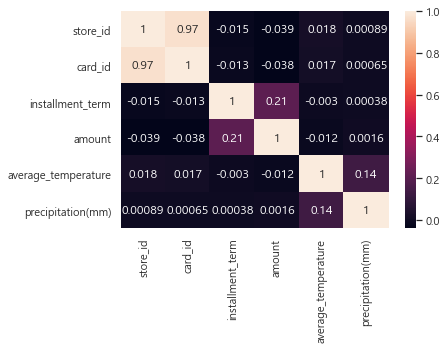

In [84]:
sns.heatmap(merge.corr(), annot=True)

In [85]:
merge.corr()

,store_id,card_id,installment_term,amount,average_temperature,precipitation(mm)
store_id,1.000000,0.969913,-0.014850,-0.039050,0.017864,0.000887
card_id,0.969913,1.000000,-0.013416,-0.038105,0.017085,0.000653
installment_term,-0.014850,-0.013416,1.000000,0.212303,-0.002986,0.000384
amount,-0.039050,-0.038105,0.212303,1.000000,-0.011892,0.001554
average_temperature,0.017864,0.017085,-0.002986,-0.011892,1.000000,0.135396
precipitation(mm),0.000887,0.000653,0.000384,0.001554,0.135396,1.000000


## 업종에따른 거래금액 비교

In [86]:
business=merge.groupby(['type_of_business'])['amount'].aggregate(['sum'])
business=business.sort_values(by=['sum'], ascending=False)
business

,sum
type_of_business,
한식음식점업,1.557495e+10
미용업,6.717205e+09
학원,6.650186e+09
의류업,5.568959e+09
소매업,5.044644e+09
외국음식,4.989361e+09
주점,3.454860e+09
패스트푸드,2.826107e+09
식료품,2.640119e+09


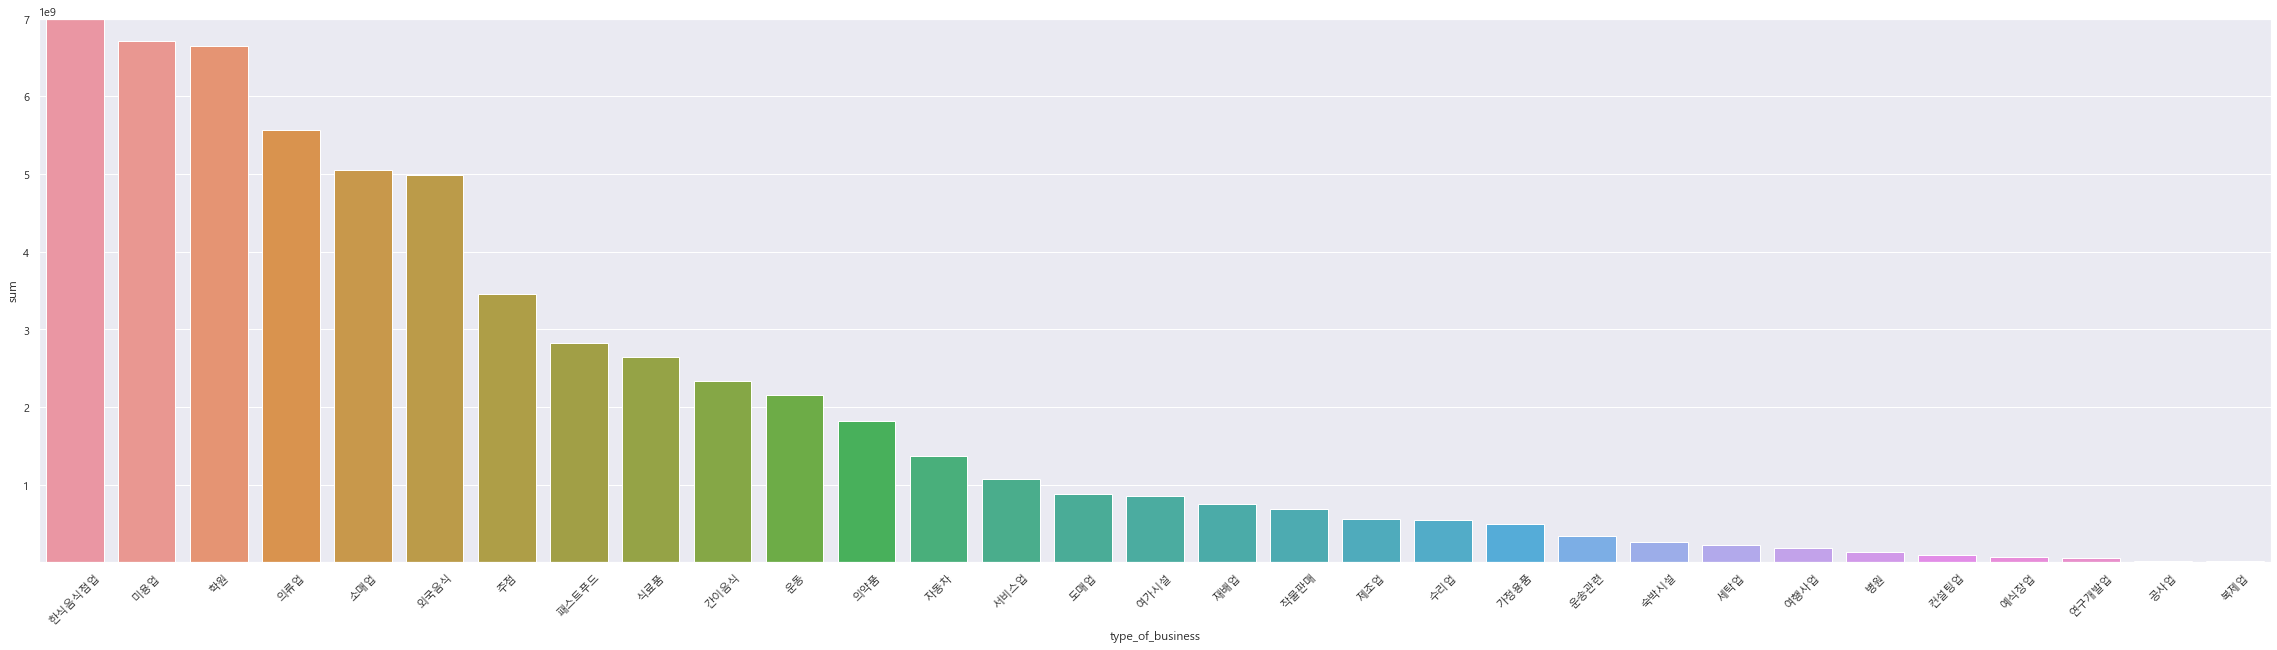

In [87]:
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=business , x=business.index , y='sum')
plt.ylim(4000000,7000000000)
plt.xlim()
plt.show()

## 지역에따른 거래량 비교

In [88]:
regi=merge.groupby(['region'])['amount'].aggregate(['sum'])
regi=regi.sort_values(by=['sum'], ascending=False)
regi

,sum
region,
경기,1.490733e+10
서울,1.318095e+10
부산,5.231758e+09
경남,4.918536e+09
경북,4.194091e+09
대구,3.211134e+09
인천,3.182711e+09
충북,3.079184e+09
충남,2.545627e+09


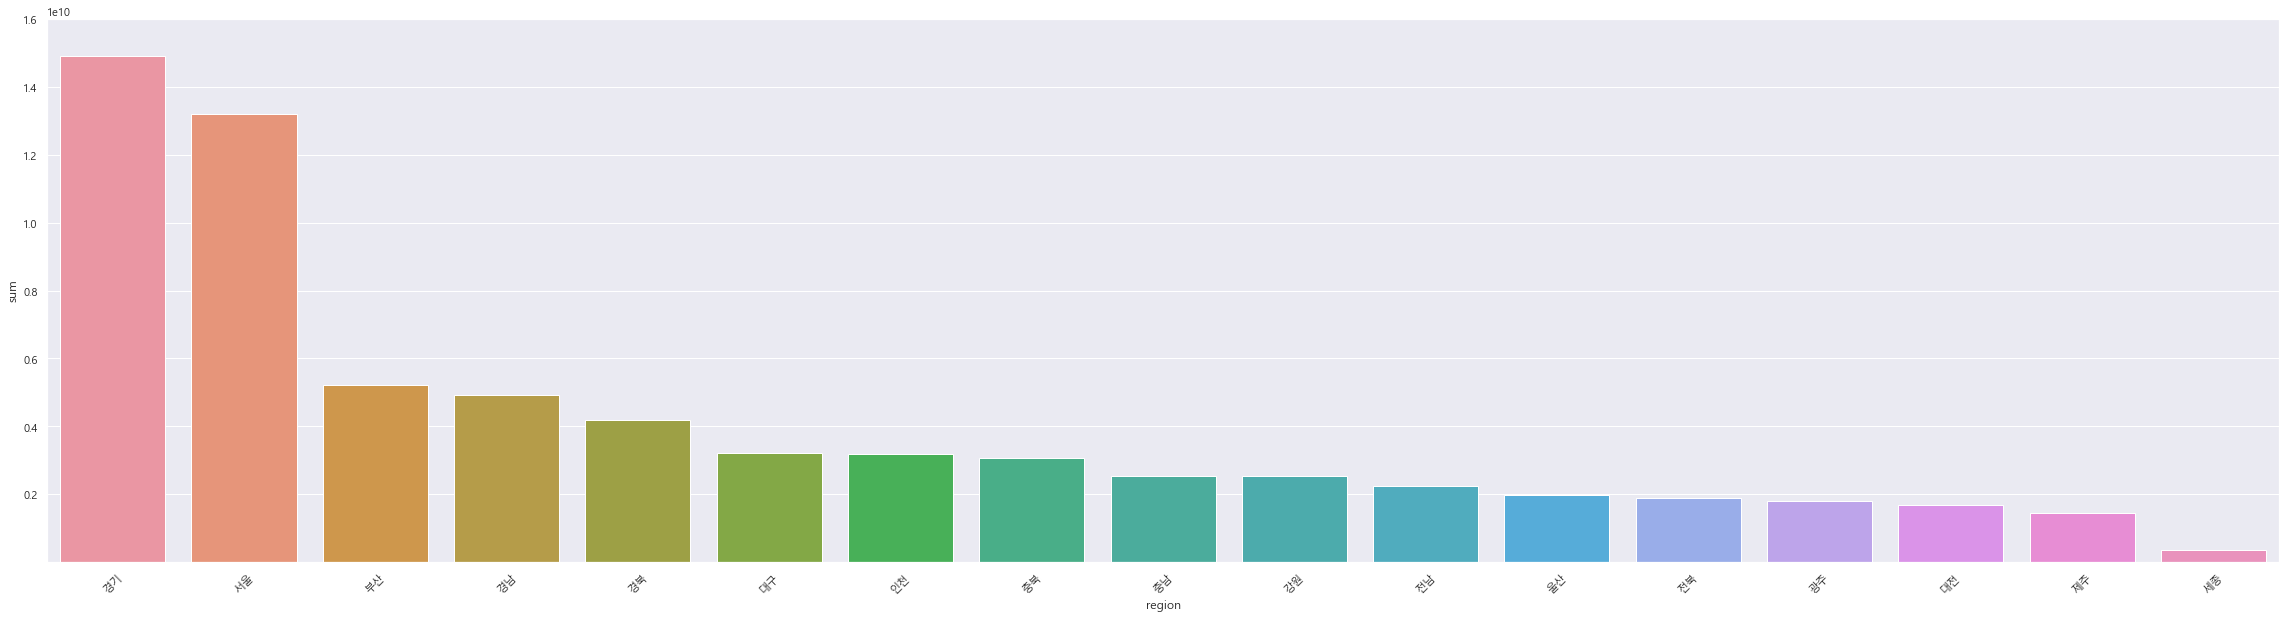

In [89]:
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=regi , x=regi.index , y='sum')
plt.ylim(4000000,16000000000)
plt.xlim()
plt.show()

## 기온에 따른 거래량 비교

In [90]:
temperature=merge.groupby(['average_temperature'])['amount'].aggregate(['sum'])
temperature


,sum
average_temperature,
-14.8,2.200343e+07
-14.6,3.140032e+06
-14.2,1.157254e+07
-14.0,1.906098e+07
-13.7,9.891921e+06
...,...
33.1,1.689451e+07
33.4,1.670700e+06
33.6,1.414304e+07


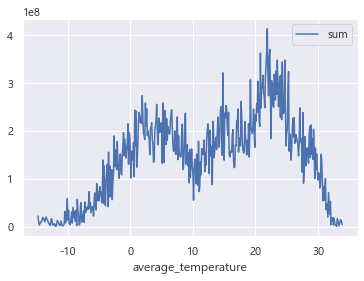

In [91]:
temperature.plot()

## 날짜에 따른 거래량 비교

In [92]:
year=merge.groupby(['transacted_date'])['amount'].aggregate(['sum'])
year

,sum
transacted_date,
2016-06-01,6.520140e+07
2016-06-02,5.711538e+07
2016-06-03,5.513237e+07
2016-06-04,5.592585e+07
2016-06-05,3.591438e+07
...,...
2019-02-24,4.434073e+07
2019-02-25,8.621241e+07
2019-02-26,9.583042e+07


In [93]:
year.index=pd.to_datetime(year.index)

In [94]:
year

,sum
transacted_date,
2016-06-01,6.520140e+07
2016-06-02,5.711538e+07
2016-06-03,5.513237e+07
2016-06-04,5.592585e+07
2016-06-05,3.591438e+07
...,...
2019-02-24,4.434073e+07
2019-02-25,8.621241e+07
2019-02-26,9.583042e+07


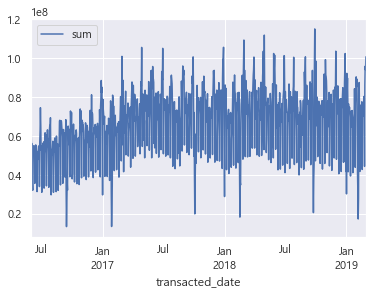

In [95]:

year.plot()


## 의사결정나무 분석


In [2]:
merge= pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데마/데이터마이닝/resource.csv')
merge.head()

,Unnamed: 0,Unnamed: 0.1,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm),datetime,year_month
0,0,0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 13:31:00,2016-06
1,1,1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0,2016-06-01 14:18:00,2016-06
2,2,2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:07:00,2016-06
3,3,3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:12:00,2016-06
4,4,4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 16:06:00,2016-06


In [3]:
merge.drop('Unnamed: 0', axis=1 , inplace=True)

In [4]:
merge.drop('Unnamed: 0.1', axis=1 , inplace=True)

In [5]:
merge.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,average_temperature,precipitation(mm),datetime,year_month
0,1,1931,b,2016-06-01,13:31,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 13:31:00,2016-06
1,1,1932,h,2016-06-01,14:18,0,경기,한식음식점업,428.571429,22.7,0.0,2016-06-01 14:18:00,2016-06
2,1,1933,c,2016-06-01,15:07,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:07:00,2016-06
3,1,1934,g,2016-06-01,15:12,0,경기,한식음식점업,1142.857143,22.7,0.0,2016-06-01 15:12:00,2016-06
4,1,1935,a,2016-06-01,16:06,0,경기,한식음식점업,1071.428571,22.7,0.0,2016-06-01 16:06:00,2016-06


## 숫자가 지수표현으로 표현되는것을 방지해주는 코드

In [6]:
pd.options.display.float_format = '{:.5f}'.format

## 지역과 업종에 대해 알아보고자, groupby하였고, 수치형데이터 중 amount는 합계로하고 나머지 날씨 데이터는 평균값을 적용하였다.

In [7]:
merge=merge.groupby(['region','type_of_business']).aggregate({ "amount": 'sum' , 'average_temperature': 'mean','precipitation(mm)':'mean'}).reset_index()

In [8]:
merge

,region,type_of_business,amount,average_temperature,precipitation(mm)
0,강원,가정용품,331614.28571,4.72766,0.38670
1,강원,간이음식,92810142.57143,14.54327,4.48853
2,강원,도매업,14021142.85714,12.98218,3.17490
3,강원,미용업,154879738.85712,14.51299,3.66934
4,강원,서비스업,26107142.85714,14.01505,3.98936
...,...,...,...,...,...
319,충북,제조업,7742270.00000,3.64628,2.09717
320,충북,주점,105888885.71429,11.13700,3.08061
321,충북,패스트푸드,45542042.57143,12.26540,3.16345
322,충북,학원,244020714.28571,11.09215,3.10198


## Amount를 High, Medium, Low의 범주로 나누어 표현하기위해 시각화를 하였다. 추가적으로, 시각화의 x축이 자연상수e로 수치가 표현되기 때문에 ticklabel_format을 사용하여 자연상수를 무시하였다.

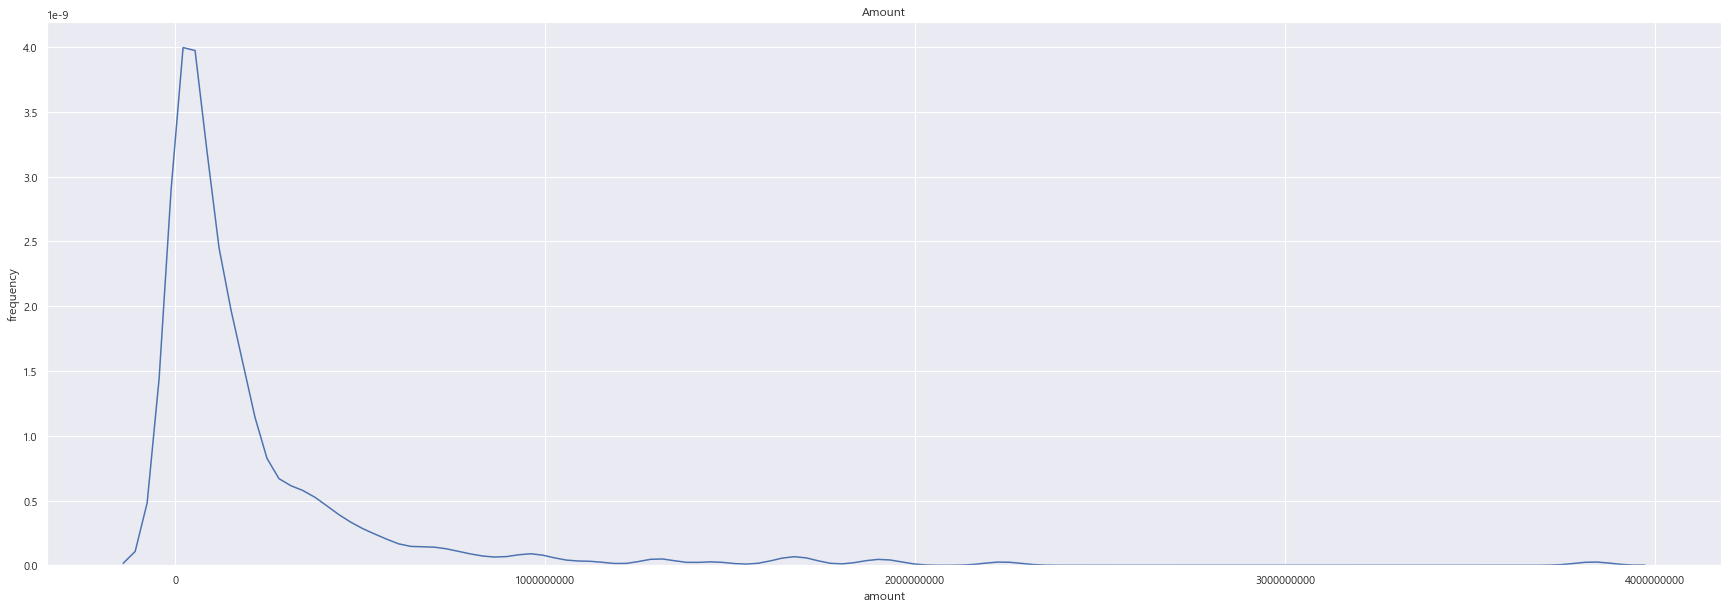

In [9]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(30,10))
p = sns.distplot(merge['amount'],kde=True,rug=False ,hist=False)

p.set_title('Amount')
p.set_xlabel('amount')
p.set_ylabel('frequency')
p.ticklabel_format(style='plain', axis='x',useOffset=False)

In [10]:
merge.amount.mean()

210951998.3408288

In [11]:
merge.amount.min()

331614.28571428556

In [12]:
merge.amount.max()

3832980304.4280143

## 보다 더 구체적인 수치로 범주를 나누기위해  percentile을 이용하여 25% , 75% 지점의 값을 알아냈다.

In [13]:
Q1 = np.percentile(merge['amount'], 25)
Q1

25868295.464285765

In [14]:
Q3 = np.percentile(merge['amount'], 75)
Q3

215948880.35714993

## 위 결과를 토대로 Low, Medium , High의 범주를 나누었다.

In [15]:
nums = merge['amount']
low_range = (nums <= 25868295.464285765)
merge.loc[low_range, 'amount'] = 'Low'
medium_range = (nums > 25868295.464285765) & (nums <= 215948880.35714993)
merge.loc[medium_range, 'amount'] = 'Medium'
high_range = (nums > 215948880.35714993) 
merge.loc[high_range, 'amount'] = 'High'

In [16]:
merge.amount.value_counts()

Medium    162
Low        81
High       81
Name: amount, dtype: int64

## DecisionTreeClassifier을 하기위해, 지역과, 업종을 수치형으로 전환해준다.

In [17]:
from sklearn.preprocessing import LabelEncoder
r = pd.DataFrame(merge['region'].value_counts())
a = []
for i in r.index:
    a.append(i)
a = list(a)
encoder = LabelEncoder()
encoder.fit(a)
labels = encoder.transform(a)
b = {}
b.update(zip(a, labels))
merge['region_n'] = merge['region'].map(b)

In [18]:
from sklearn.preprocessing import LabelEncoder
r = pd.DataFrame(merge['type_of_business'].value_counts())
a = []
for i in r.index:
    a.append(i)
a = list(a)
encoder = LabelEncoder()
encoder.fit(a)
labels = encoder.transform(a)
b = {}
b.update(zip(a, labels))
merge['type_of_business_n'] = merge['type_of_business'].map(b)

In [19]:
merge.head()

,region,type_of_business,amount,average_temperature,precipitation(mm),region_n,type_of_business_n
0,강원,가정용품,Low,4.72766,0.38670,0,0
1,강원,간이음식,Medium,14.54327,4.48853,0,1
2,강원,도매업,Low,12.98218,3.17490,0,3
3,강원,미용업,Medium,14.51299,3.66934,0,4
4,강원,서비스업,Medium,14.01505,3.98936,0,7


In [20]:
merge.columns

Index(['region', 'type_of_business', 'amount', 'average_temperature',
       'precipitation(mm)', 'region_n', 'type_of_business_n'],
      dtype='object')

## x에는 지역, 업종, 날씨데이터로 지정하고, y에는 amount로 지정하였다.

In [21]:
feature_cols = ['region_n', 'type_of_business_n', 'average_temperature',
       'precipitation(mm)']

X = merge[feature_cols]
y = merge.amount

## test size : 30% , train size : 70%

In [22]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## 여러 depth에 대한 정확도

In [23]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
for i in range(1,11):
    treeclf2 = DecisionTreeClassifier(max_depth=i, random_state=1)
    treeclf2 = treeclf2.fit(X_train,y_train)
    y_pred = treeclf2.predict(X_test)

    print( "Accuracy when depth is " ,i       ,metrics.accuracy_score(y_test, y_pred))

Accuracy when depth is  1 0.6224489795918368
Accuracy when depth is  2 0.6326530612244898
Accuracy when depth is  3 0.673469387755102
Accuracy when depth is  4 0.673469387755102
Accuracy when depth is  5 0.5408163265306123
Accuracy when depth is  6 0.673469387755102
Accuracy when depth is  7 0.5714285714285714
Accuracy when depth is  8 0.5204081632653061
Accuracy when depth is  9 0.5918367346938775
Accuracy when depth is  10 0.5918367346938775


## 정확도가 높으며, 분석도 용이하게 하기위해 depth = 6으로 설정하였고, 정확도는 약 67%이다.

In [24]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=6, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [25]:
from sklearn.tree import export_graphviz
# create a Graphviz file
with open("07_titanic.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

In [26]:
! dot -Tpng 07_titanic.dot -o titanictree.png

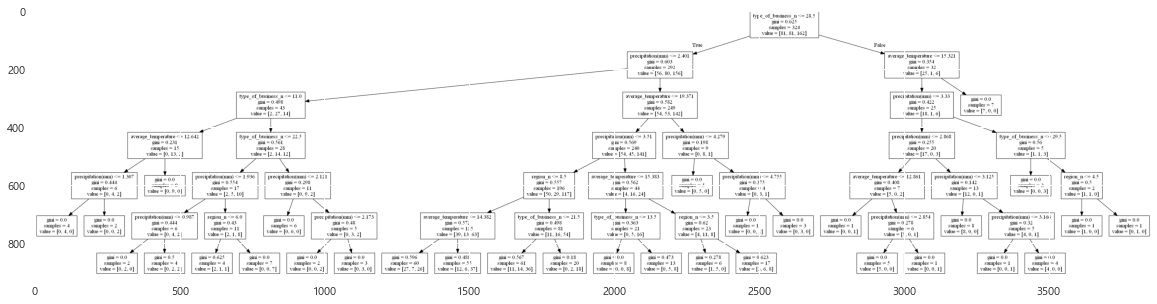

In [27]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('titanictree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## 결과적으로 나온 decision tree의 모습이고, 분석결과로 예시를 말씀드리자면, 서울지역에서의 소매업은 평균기온이 약 14~15도인 봄, 가을 게절에 매출이 높은것으로 나타났습니다. 따라서 이러한 분석결과들을 바탕으로 날씨에 따른 해당지역과 업종에 매출액을 파악하여 금융기회를 제공 시 고려할 수 있는 요인으로 생각해볼 수 있습니다


In [28]:
merge.loc[(merge['type_of_business_n'] <= 28.5) & (merge['precipitation(mm)'] <= 3.772) & (merge['region_n'] >= 7.5)& (merge['region_n'] <= 8.5) & (merge['average_temperature'] <= 15.599)& (merge['average_temperature'] >= 14.099)]

,region,type_of_business,amount,average_temperature,precipitation(mm),region_n,type_of_business_n
161,서울,도매업,Medium,14.62186,3.10543,8,3
165,서울,세탁업,Medium,14.13316,2.61294,8,8
166,서울,소매업,High,14.55421,3.12974,8,9
167,서울,숙박시설,Low,15.40553,3.72791,8,11
173,서울,운송관련,Medium,14.22117,2.36422,8,19
178,서울,재배업,Low,15.08162,2.75387,8,24


In [29]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,region_n,0.10413
1,type_of_business_n,0.32836
2,average_temperature,0.19604
3,precipitation(mm),0.37147
